## Análisis de dataset de MiBici de Guadalajara, México

### Abstract

El siguiente dataset contiene información de los viajes del sistema de Bicicletas Públicas MiBici del Área Metropolitana de Guadalajara del mes de mayo del 2020 al 2023, el programa actúa como complemento o extensión a otros sitemas de transporte de la ciudad, el sistema actualmente cuenta con 3,200 bicicletas y 300 estaciones en los municipios de Guadalajara, Zapopan y Tlaquepaque.

Desde que la plataforma inicio se ha visto un incremento consistente en el número de usuarios de la plataforma, en cuanto a los usuarios que se han mantenido activos también es consistente el crecimiento. 

El análisis de los viajes, tanto su destino como origen, nos pueden dar varios indicadores de que estaciones son las más concurridas, o los destinos de mayor concurrencia de los viajes, esto nos puede dar una idea de en que horarios y hacia que zonas los usuarios se mueven en el día a día y con este análisis poder identificar en que estaciones se requiere mas bicis y mantenimiento al sistema de conexión.

El sistema de conexión de las estaciones han sido reportados diferentes fallos, pero principalmente fallos relacionados con el inicio/finalización de los viajes, hay diferentes factores que influyen en el fallo, desde el hardware de wifi en las estaciones y también la demanda en horas picas en dichas estaciones.

Estas fallas en el sistema de conexión nos llevan a tener viajes sin finalización, o viajes finalizados despues de varios dias de su inicio, así como otras inconsistencias en los datos recabados por el sistema, además de ofrecer una mala experiencia para el usuario.

En el dataset encontramos información acerca de los usuarios y sus viajes, así como datos extras relacioandos con las estaciones de origen y destino de los viajes, así como su ubicación y a la zona a la que pertenecen.

### Preguntas e Hipótesis

Algunas preguntas de interes que han surgido apartir del análisis del dataset son:

* ¿Podríamos identificar los días y horarios con mayor afluencia de usuarios iniciando/finalizando viajes? Esto nos podría dar un mejor entendimiento de los horarios con mayor carga para el sistema de conexión de las estaciones, así como ver en que horario programar los mantenimientos preventivos de cada estación
* ¿Qué factores están impulsando la adopción del uso de MiBici entre hombres y mujeres?
* ¿Podemos pronosticar que estaciones origen/destino son y serán las más concurridas en los próximos meses?, esto nos podría ayudar a dar mantenimiento preventivo a los sitemas de conexión en dichas estaciones
* ¿Es la edad y género un factor en el tiempo de duración de los viajes de los usuarios?
* ¿Es el género un factor sobre la afluencia de usuarios en horarios nocturnos?, la inseguridad en general y el acoso/inseguridad en específico hacia el género femenino podrían estar afectando la adopción del uso de MiBici

## Contexto analítico

En nuestro dataset contenemos varias columnas de interés, se identificarón las siguientes:

| variable | descripcion | 
| :--- | :--- | 
| `gender` | El género del usuario | 
| `age` | La edad del usuario | 
| `trip_duration_minutes` | La duración del viaje en bicicleta | 
| `year` | El año en el que se realizó el viaje |
| `origin_name` | Nombre de la estación donde inició el viaje |
| `origin_location` | Ubicación en la zona metropolitana de guadalajara donde se encuentra la estación |
| `origin_id` | El id de la estación donde inició el viaje |
| `destination_name` | Nombre de la estación donde finalizó el viaje |
| `destination_location` | Ubicación en la zona metropolitana de guadalajara donde se encuentra la estación |
| `destination_id` | El id de la estación donde finalizó el viaje |
| `origin_latitude` | La latitud de la estación donde inició el viaje |
| `origin_lontiude` | La longitud de la estación donde inició el viaje |
| `destination_latitude` | La latitud de la estación donde finalizó el viaje |
| `destination_lontiude` | La longitud de la estación donde finalizó el viaje |


## Definición de objetivo

¿Cómo podemos optimizar el mantenimiento para el sistema de conexión de las estaciones sin afectar la disponibilidad del servicio?
¿Cómo podemos disminuir la brecha de la adopción del servicio entre los usuarios de género masculino y femenino?

## Contexto comercial

El área metropolitana de guadalajara brinda servicio a miles de usuarios quiénes usan la bicicleta como principal medio de transporte en su día a día, el servicio a experimentado una creciente demanda desde que fue implementado en 2014 gracias a la suma de esfuerzos de colectivos ciclistas y dependencias gubernamentales que han promovido el uso de la bicicleta en la metrópoli. Actualmente el programa cuenta con 3200 bicicletas y 300 estaciones en los municipios de Guadalajara, Zapopan y Tlaquepaque.

La Agencia Metropolitana de Servicios de Infraestructura para la Movilidad (AMIM), es el organimos público descentralizado intermunicipial que se encarga de supervisar la red de semáforos, radares de velocidad y el sistema de bicicleta pública "MiBici", PIMA es el programa de infraestructura para la Movilidad Activa que concentra la operación de "MiBici".

Por otra parte las mejores al sistema continuán, aun así, se han recibido reporte por parte de los usuarios que han tenido problemas con servicio, al iniciar un viaje, finalizar el viaje, etc.. Además de que se ve afectada la disponibilidad de las bicicletas cuando se les da mantenimiento.

## Problema comercial

* ¿Cualés son los días mas concurridos por los usuarios?
* ¿Cómo es la distribución de viajes por género?
* ¿Cuál es la duración de los viajes por año y género?

#### Días mas concurridos por los usuarios

En el siguiente apartado visualizaremos cuales son los días con más viajes en bici por parte de los usuarios, se removeran viajes con una duración atípica (outliers).

Text(0, 0.5, 'viajes por dia')

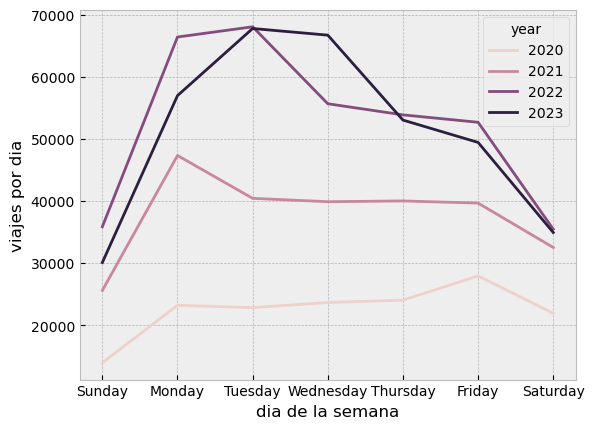

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from datetime import datetime, date

# setting matplot lib styles
mpl.style.use('bmh')

# loading our dataset
df = pd.read_csv('../challenge_three/datasets/mibici_2021_2023.csv')

# calculating upper and lower limit to avoid outliers
upper_limit_age = df['age'].mean() + 2* df['age'].std() # Right from the mean
lower_limit_age = df['age'].mean() - 2* df['age'].std() # Left from the mean
# trip duartion outliers
upper_limit_trip_duration = df['trip_duration_hours'].mean() + 2* df['trip_duration_hours'].std() # Right from the mean
lower_limit_trip_duration = df['trip_duration_hours'].mean() - 2* df['trip_duration_hours'].std() # Left from the mean

# filtering data to avoid outliers in age column
df_cleaned = df.copy()
df_cleaned = df_cleaned[(df_cleaned['age']>lower_limit_age) & (df_cleaned['age']<upper_limit_age)]
df_cleaned = df_cleaned[(df_cleaned['trip_duration_hours']>lower_limit_trip_duration) & (df_cleaned['trip_duration_hours']<upper_limit_trip_duration)]

# visualization of trips by day
df_cleaned['start_trip_date'] = pd.to_datetime(df_cleaned['start_trip'], format='%d/%m/%y %H:%M')
df_cleaned['day'] = df_cleaned.start_trip_date.dt.day_name()
trips_by_year_day = df_cleaned.groupby(by=['year', 'day'], as_index=False).size()

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_name = CategoricalDtype(categories=days, ordered=True)
trips_by_year_day['day'] = trips_by_year_day['day'].astype(day_name)

ax = sns.lineplot(data=trips_by_year_day, x='day', y="size", hue="year")
ax.set_xlabel('dia de la semana')
ax.set_ylabel('viajes por dia')

#### Viajes del mes de mayo del 2023 al 2020 por género (Masculino y Femenino)

Text(0.5, 0, 'Año (Mes Mayo)')

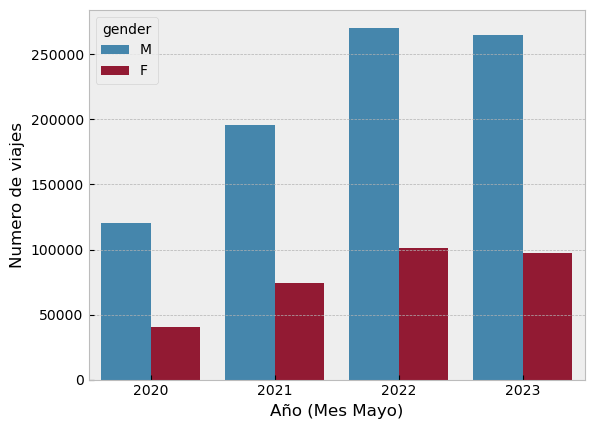

In [21]:
ax = sns.countplot(data=df,x='year', hue="gender")
ax.set_ylabel("Numero de viajes")
ax.set_xlabel("Año (Mes Mayo)")

En el crecimiento de la adopción de MIBici en los últimos años, podemos identificar que le subconjunto de usuarios de género Femenino no ha tenido la misma adopción, esto puede ser causa por una serie de factores.

#### Duración de los viajes por año y género

A continuación visualizaremos la duración de los viajes de los usuarios agrupados por género y año, se removeran valores atípicos (outliers).

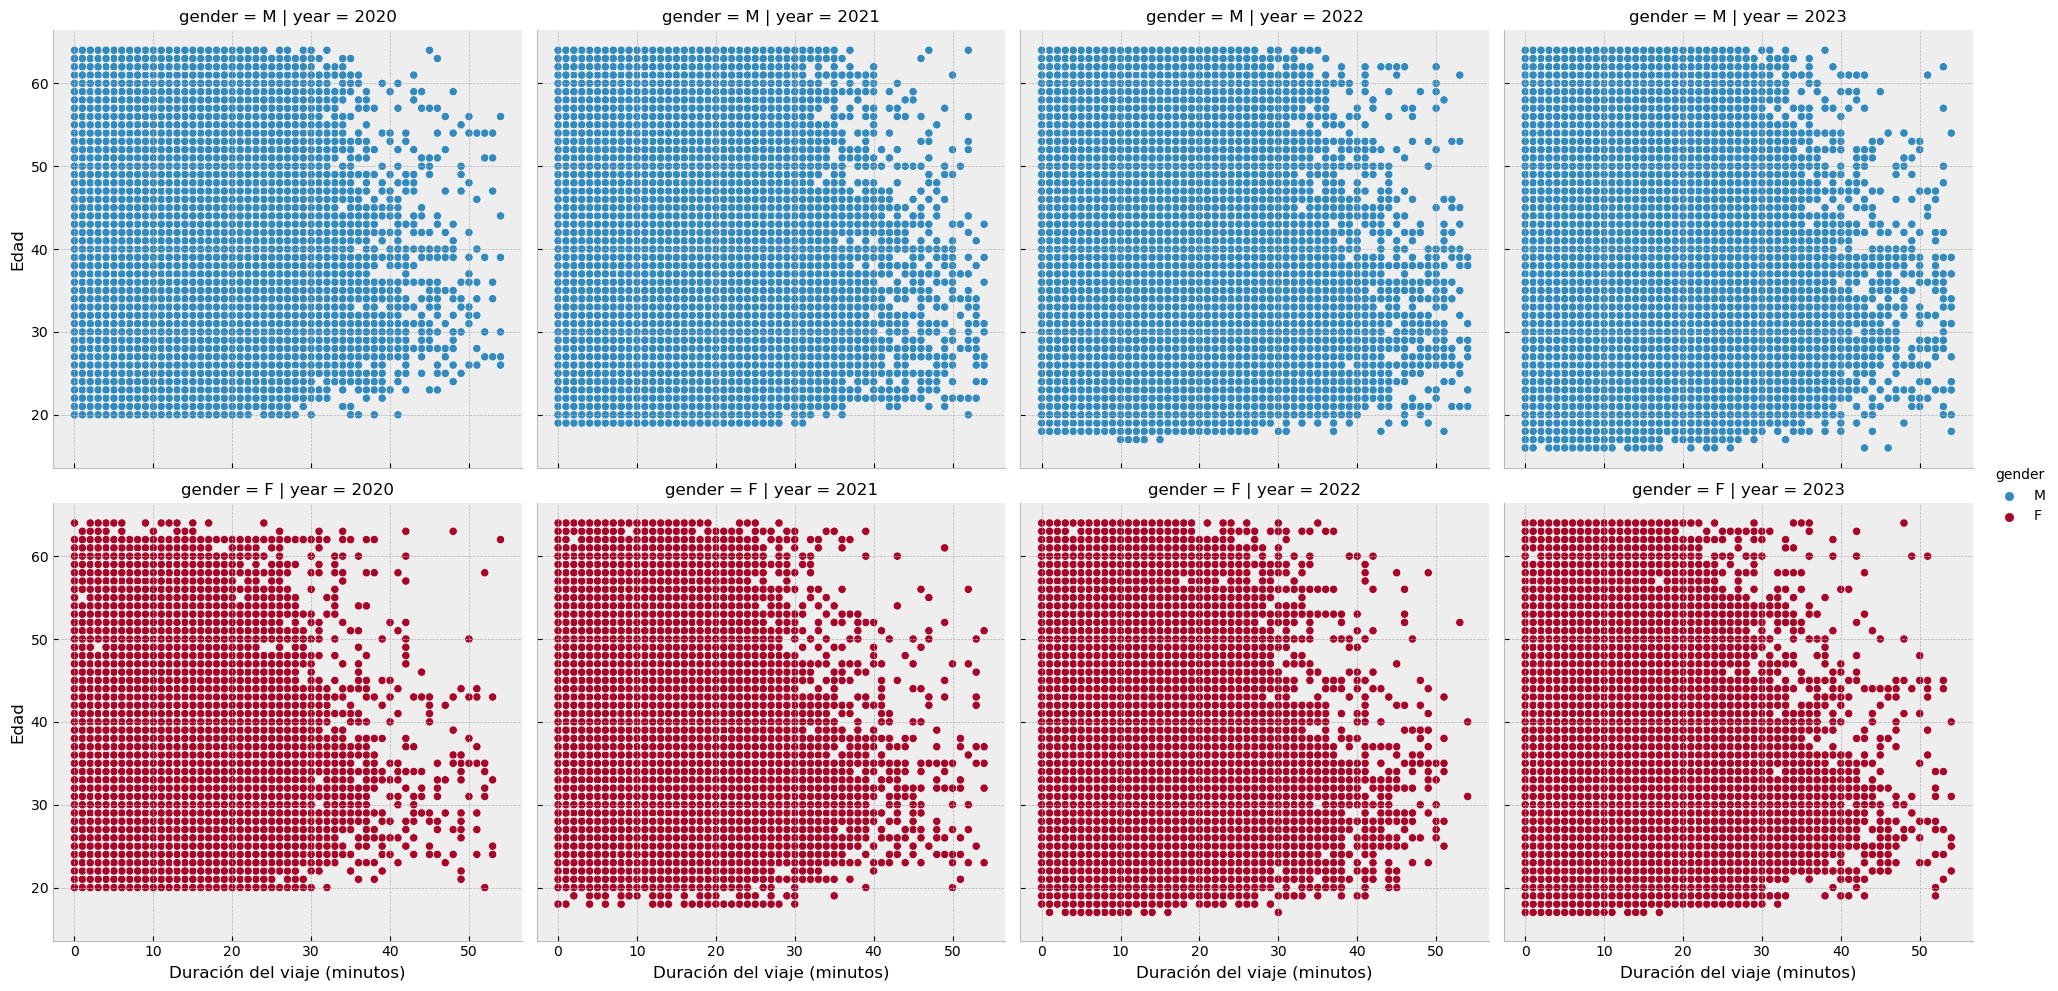

In [22]:
g = sns.relplot(data=df_cleaned, x="trip_duration_minutes", y="age", hue="gender", col="year", row="gender")
g.set_xlabels("Duración del viaje (minutos)")
g.set_ylabels("Edad")

Como podemos observar la mayoría de los viajes se encuentran en el límite de los 30 minutos que son gratis con la subscripción (anual o mensual), y la duración de los viajes es ligeramente mayor en el género masculino.

## Exploración de datos (EDA)

### Viajes del mes de mayo del 2023 al 2020

Text(0.5, 0, 'Año (Mes Mayo)')

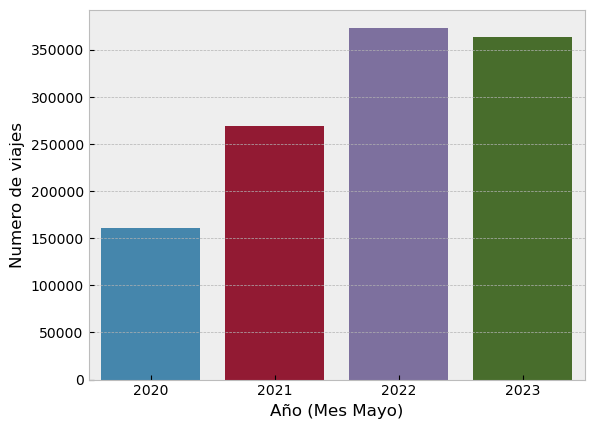

In [23]:
# count trips by year
trips_by_year = df.groupby(['year']).size()

ax = sns.countplot(data=df, x="year", )
ax.set_ylabel("Numero de viajes")
ax.set_xlabel("Año (Mes Mayo)")

Como podemos observar el número de viajes ha crecido y se ha mantenido en los ultimos años, la programación oportuna e identificación del mejor horario para el mantenimiento de las estaciones y bicicletas es fundamental para mantener el servicio disponible aun en los horarios y días con mayor demanda

### Edad de los usuarios

En el siguiente apartado vamos visualizar la edad de los usuarios removiendo los outliers que existan en el dataset

Text(0, 0.5, 'edad')

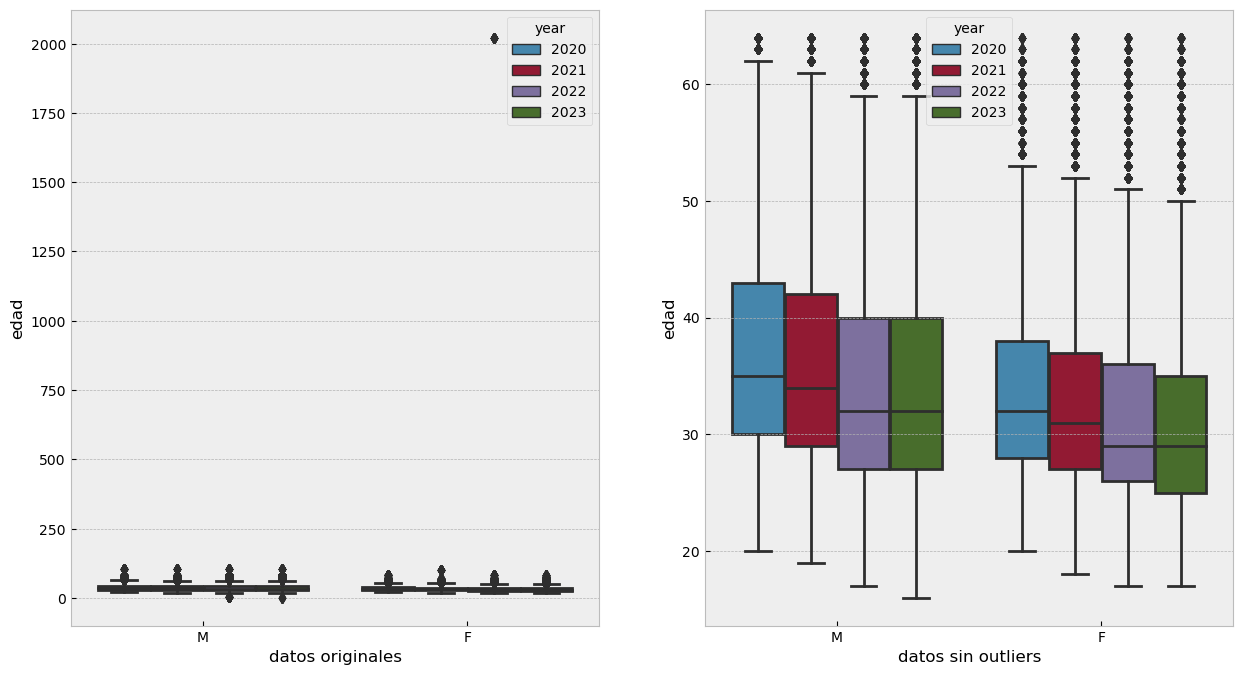

In [24]:
# calculating upper and lower limit to avoid outliers
upper_limit_age = df['age'].mean() + 2* df['age'].std() # Right from the mean
lower_limit_age = df['age'].mean() - 2* df['age'].std() # Left from the mean

# filtering data to avoid outliers in age column
df_cleaned = df.copy()
df_cleaned = df_cleaned[(df_cleaned['age']>lower_limit_age) & (df_cleaned['age']<upper_limit_age)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
# before removing outliers
sns.boxplot(data=df, x='gender', y='age', hue='year', orient='v', ax=ax[0])
ax[0].set_xlabel('datos originales')
ax[0].set_ylabel('edad')
# after removing outliers
sns.boxplot(data=df_cleaned, x='gender', y='age', hue='year', orient='v', ax=ax[1])
ax[1].set_xlabel('datos sin outliers')
ax[1].set_ylabel('edad')

### Viajes por sector del área metropolitana de Guadalajara

A continuación visualizamos en que ubicación del área metropolitana de guadalajara se concentran la mayoría de los viajes

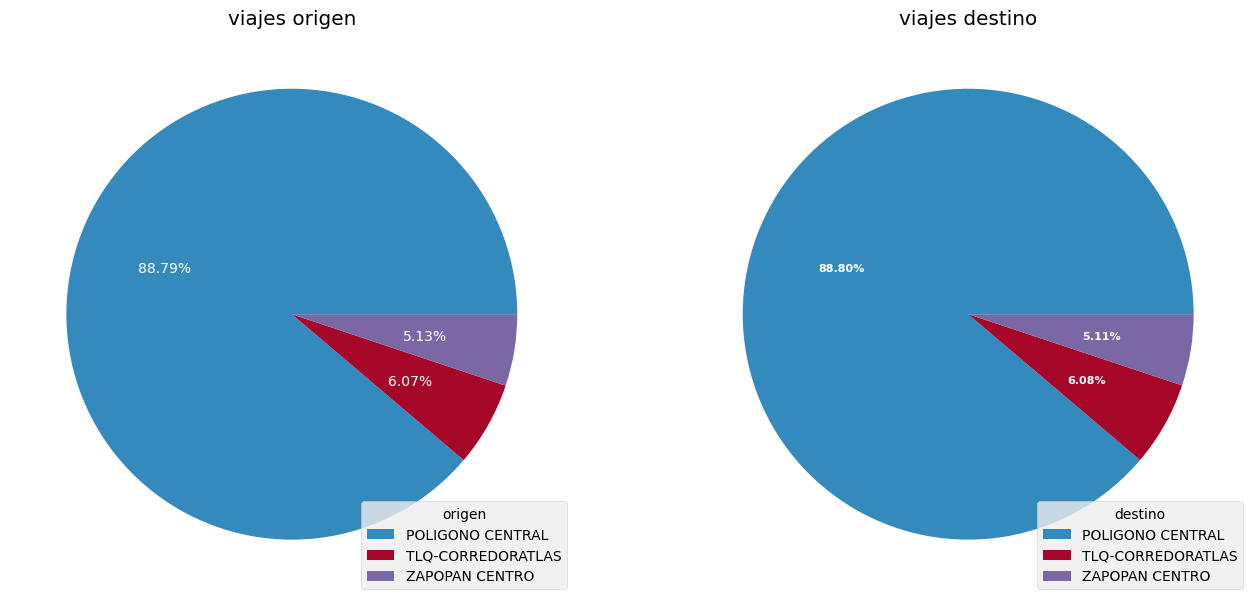

In [25]:
trips_by_origin = df['origin_location'].value_counts()
trips_by_destination = df['destination_location'].value_counts()

# pie plot to see the gender distribution of our users
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax[0].pie(
    trips_by_origin, 
    autopct='%1.2f%%',
    textprops=dict(color="w")
)
ax[0].set_title("viajes origen")
ax[0].legend(wedges, trips_by_origin.index,
          title="origen",
          loc="lower right",
)

wedges, texts, autotexts = ax[1].pie(
    trips_by_destination, 
    autopct='%1.2f%%',
    textprops=dict(color="w")
)
ax[1].set_title("viajes destino")
ax[1].legend(wedges, trips_by_origin.index,
          title="destino",
          loc="lower right",
)

plt.setp(autotexts, size=8, weight="bold")

plt.show()

## Algoritmo de regresión lineal para predecir el tiempo de viaje de los usuarios

A continuaci'on realizaremos un ejercicio de feature selection para 

In [6]:
# installing libs

!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import sys
import joblib
from IPython.display import display, HTML
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

sys.modules['sklearn.externals.joblib'] = joblib

In [15]:
# preparing feature matrix and target data sets
new_df = df_cleaned.dropna().copy()
new_df['gender'] = df['gender'].replace(['M', 'F'], [1, 2])

# feature matrix
X = new_df.drop(
    columns=[
        'trip_duration_minutes',
        'trip_id',
        'birthday',
        'start_trip', 
        'end_trip',
        'start_trip_date',
        'day',
        'trip_duration_hours',
        'origin_name',
        'origin_obcn',
        'origin_location',
        'origin_status',
        'destination_name',
        'destination_obcn',
        'destination_location',
        'destination_status'
    ], 
    axis=1
)

# target
y = new_df["trip_duration_minutes"]

display(X.head())
display(y)

,user_id,gender,age,year,origin_id,origin_latitude,origin_longitude,destination_id,destination_latitude,destination_longitude
0,70123,1.0,56.0,2023,64,20.673072,-103.365055,141,20.65381,-103.40134
1,1515654,2.0,29.0,2023,50,20.674721,-103.358548,141,20.65381,-103.40134
2,306600,1.0,32.0,2023,131,20.666914,-103.402512,141,20.65381,-103.40134
3,1107631,1.0,27.0,2023,131,20.666914,-103.402512,141,20.65381,-103.40134
4,1744633,1.0,29.0,2023,313,20.663707,-103.417817,141,20.65381,-103.40134


0          22.0
1          36.0
2           9.0
3          13.0
4          10.0
           ... 
1167884     8.0
1167885     8.0
1167888     7.0
1167889    13.0
1167890     7.0
Name: trip_duration_minutes, Length: 1146009, dtype: float64

In [16]:
# setting algorithm for feature selection (forward selection)

# Sequential Forward Selection(sfs)
sfs = SFS(
    LinearRegression(),
    k_features=10,
    forward=True,
    floating=False,
    scoring = 'r2',
    cv = 0
)

In [17]:
# fit 
sfs.fit(X, y)
# final feature selection list
sfs.k_feature_names_

('user_id',
 'gender',
 'age',
 'year',
 'origin_id',
 'origin_latitude',
 'origin_longitude',
 'destination_id',
 'destination_latitude',
 'destination_longitude')

### Entrenamiento de modelo de regresión lineal

In [76]:
# we split the train test into 80% train/20% test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# create model
lr = LinearRegression()

# adjust model with x train and y train, fit linear model
lr.fit(x_train,y_train)

# predict using linear model
test_predictions = lr.predict(x_test)
training_predictions = lr.predict(x_train)

In [81]:
r2 = r2_score(y_test,test_predictions)
print("R2", r2)

R2 0.019339900491486595


### Conclusiones
Como podemos observar en la seleccion de características, hay varias columnas que pueden no ser importantes para el modelo de regresión lineal, para poder entender cual conjunto de características es mejor para el modelo tendríamos que evaluar varias combinaciones de características así como el número de ellas y evaluar el resultado de las métricas del conjunto de características entrenado.